<img src="img/Auswahl_2016-05-02_001.png"></img>

### Groupname: Gruppe 5

<table align="left" style="border-style: hidden; border-collapse: collapse">
  <tr>
    <td>Arne Siebenmorgen</td>
    <td>330529</td>
  </tr>
  <tr>
    <td>Holger Prang </td>
    <td>WM</td>
  </tr>
  <tr>
    <td>Eugene Reese</td>
    <td>319776</td>
  </tr>
  <tr>
    <td>Jens Meiners</td>
    <td>332697</td>
  </tr>
</table>

In [1]:
%matplotlib inline  
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os

In [2]:
def pca(data, axis=0, center=True, normalize=False):
    mu = data.mean(axis=axis)
    if center:
        data = data - mu
    if normalize:
        data = (data - mu)/data.std(axis=0)
    eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
    return eigenvectors, eigenvalues

def project(data, eigenvectors, axis=0):
    projected_data = np.dot(data, eigenvectors)
    sigma = projected_data.std(axis=axis).mean()
    return projected_data, sigma

<img src="img/Auswahl_2016-05-02_002.png"></img>

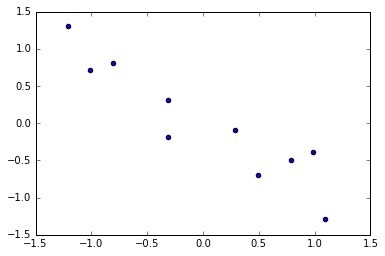

In [3]:
pcadata2d = np.genfromtxt('pca-data-2d.dat', delimiter='   ',skip_header=0)
pcadata2dCentered = pcadata2d - np.mean(pcadata2d,axis=0)
plt.scatter(pcadata2dCentered[:,0],pcadata2dCentered[:,1] )

<img src="img/Auswahl_2016-05-02_003.png"></img>

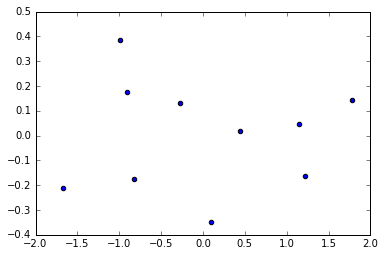

In [4]:
pcadata2dPCA, eigvals = pca(pcadata2dCentered, center=False) # data was already centered
projectedpcadata2d, sigma = project(pcadata2dCentered, pcadata2dPCA)
plt.scatter(projectedpcadata2d[:,0],projectedpcadata2d[:,1] )

<img src="img/Auswahl_2016-05-02_004.png"></img>

In [105]:
#TODO

<img src="img/Auswahl_2016-05-02_005.png"></img>

mean before centering
[ 0.04355465  0.09190794 -0.0594604 ]
mean after centering
[  3.75255382e-17  -4.66293670e-17  -5.99520433e-17]


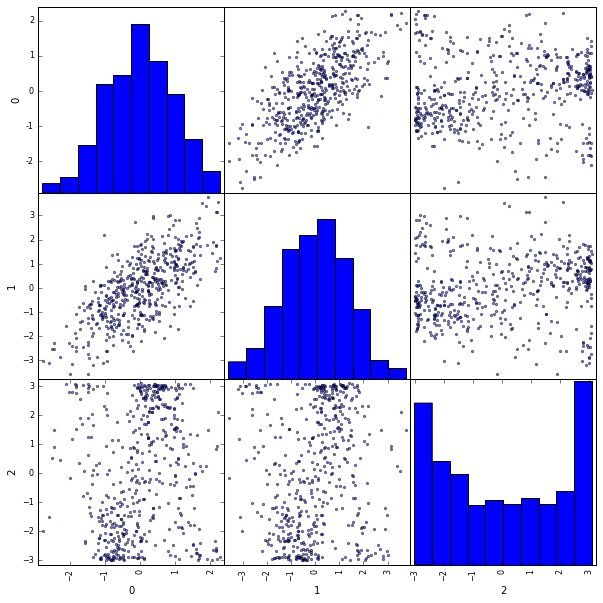

In [9]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from scipy import stats, integrate

pcadata3d = np.genfromtxt('pca-data-3d.txt',delimiter=',',skip_header=1)[:,:]
print('mean before centering')
print(np.mean(pcadata3d,axis=0))
pcadata3dCentered = pcadata3d - np.mean(pcadata3d,axis=0)
print('mean after centering') 
print(np.mean(pcadata3dCentered,axis=0))
# print(pcadata3dPCA)
df = pd.DataFrame(pcadata3dCentered[:,:3])
# make a scatter plot
scatter_matrix(df, figsize=(10, 10))
pass

<img src="img/Auswahl_2016-05-02_006.png"></img>

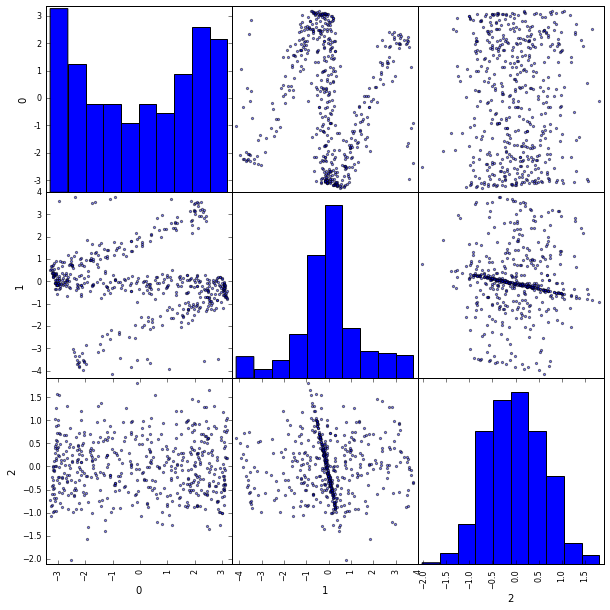

In [14]:
pcadata3dPCA, eigvals = pca(pcadata3dCentered)
# plt.scatter(pcadata3dPCA.Y[:,0],pcadata3dPCA.Y[:,1] )
# print(pcadata3dPCA)
projectedpcadata3D, sigma = project(pcadata3dCentered, pcadata3dPCA)
df = pd.DataFrame(projectedpcadata3D)
# make a scatter plot
scatter_matrix(df, figsize=(10, 10))
pass

<img src="img/Auswahl_2016-05-02_007.png"></img>

(i)


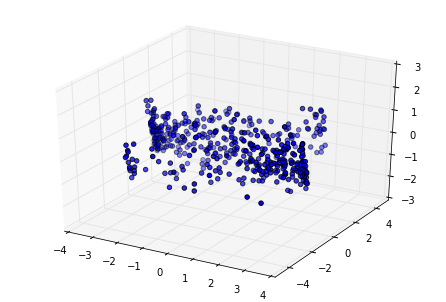

In [16]:
from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
#fig2 = pylab.figure()
#fig3 = pylab.figure()
ax = Axes3D(fig)
#ax2 = Axes3D(fig2)
#ax3 = Axes3D(fig3)

print("(i)")
sequence_containing_x_vals = projectedpcadata3D[:,0]
sequence_containing_y_vals = projectedpcadata3D[:,1]
sequence_containing_z_vals = projectedpcadata3D[:,2]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()

#print "(ii)"
#sequence_containing_x_vals = pcadata3dCentered[:,0]
#sequence_containing_y_vals = pcadata3dCentered[:,1]
#sequence_containing_z_vals = pcadata3dCentered[:,2]

#ax2.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
#pyplot.show()

#print "(iii)"
#sequence_containing_x_vals = pcadata3dPCA[:,0]
#sequence_containing_y_vals = pcadata3dPCA[:,1]
#sequence_containing_z_vals = pcadata3dPCA[:,2]

#ax3.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
#pyplot.show()

<img src="img/Auswahl_2016-05-02_008.png"></img>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import colorbar

In [70]:
data = np.genfromtxt('expDat.txt',delimiter=',',skip_header=1)[:,1:]
print(data.shape)
vecs, vals = pca(data)
print(vecs.shape)

(100, 20)
(20, 20)


<img src="img/Auswahl_2016-05-02_009.png"></img>

i)

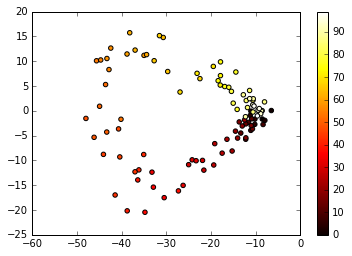

In [75]:
proj_data_2d, sigma = project(data, vecs[:,0:2])
color = np.arange(0,100)
plt.scatter(proj_data_2d[:,0], proj_data_2d[:,1],c=color, cmap=mpl.cm.hot)
colorbar()

ii)

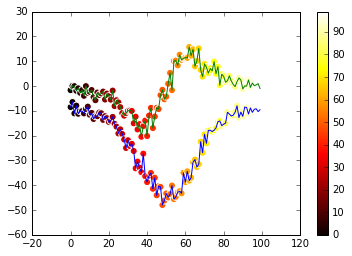

In [76]:
proj_data_first, sigma = project(data, vecs[:,0])
proj_data_second, sigma = project(data, vecs[:,1])

x = np.arange(0, 100)
plt.plot(proj_data_first)
plt.scatter(x, proj_data_first,c=color, cmap=mpl.cm.hot, edgecolors='w',s=50)
plt.plot(proj_data_second)
plt.scatter(x, proj_data_second,c=color, cmap=mpl.cm.hot, edgecolors='w',s=50)
colorbar()

<img src="img/Auswahl_2016-05-02_010.png"></img>

In [77]:
rand_data = data[np.random.permutation(100),:]

<img src="img/Auswahl_2016-05-02_011.png"></img>

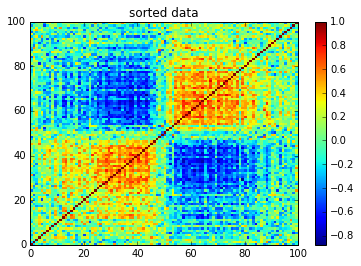

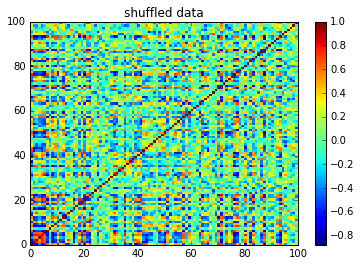

In [89]:
R_data = np.corrcoef(data)
plt.pcolor(R_data)
colorbar()
plt.title('sorted data')
plt.show()
R_rand = np.corrcoef(rand_data)
plt.pcolor(R_rand)
colorbar()
plt.title('shuffled data')
plt.show()

The Covariance plots are highly different. While in the sorted dataset, we can nicely see highly positive covariance in the beginning and the end with highly negative correlation in the middle. This aligns with the line plots on the first and second PC from 2.3 b ii. In the shuffled case the correlations are still there but naturally scattered all over place. This makes interpretation impossible. With this plots we see, that for time dependend datasets, it is highly important to maintain the order, otherwise, correlations may stay hidden in such a plot.

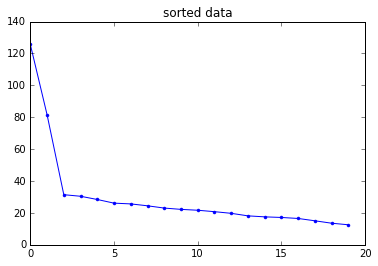

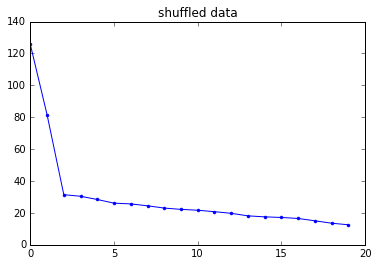

In [90]:
x = np.arange(0,20)
pca_data, data_vals = pca(data)
plt.plot(data_vals, marker='.')
plt.title('sorted data')
plt.show()
pca_rand, rand_vals = pca(rand_data)
plt.plot(rand_vals, marker='.')
plt.title('shuffled data')
plt.show()

With the covariance plots in mind it seems quite surprising that the scree plots are looking the same. We got these results because the data is still unchanged, just its ordering was manipulated. The Eigenvectors still depend on the same datapoints, their ordering does not matter. If we think of the points as a cloud in space, it makes much sense, that their ordering in the database does not have any influence on the direction of highest variance or other distances between the points. Hence its a good result to see the scree plots being exactly the same.

<img src="img/Auswahl_2016-05-02_012.png"></img>

If the columns are shuffled, the distances between the points stay the same. also, the covariance matrix will not change because the datapoints expected values remain unchanged and their ordering is maintained. to say it flat: the datapoints still correlate in the exacte same manner along the very same dimensions. Their ordering in the database has no influence whatsoever on this behavior.

<img src="img/Auswahl_2016-05-02_013.png"></img>

In [21]:
from scipy import misc

imgListString = os.listdir('imgpca/')
imgListB = list()
imgListN = list()
for name in imgListString:
    if(name.startswith('b')):
        imgListB.append(misc.imread('imgpca/'+name))
    if(name.startswith('n')):
        imgListN.append(misc.imread('imgpca/'+name))
    
#create sample matrix for buildings
sampleMatrixB = np.empty((len(imgListB)* 500,256))
counter = 0
for img in imgListB:
    for x in xrange(0, 500):
        sampleMatrixB[counter, : ] = getSampleFromImg(img).ravel()
        counter+=1

#create sample matrix for nature
sampleMatrixN = np.empty((len(imgListN)* 500,256))
counter = 0
for img in imgListN:
    for x in xrange(0, 500):
        sampleMatrixN[counter, : ] = getSampleFromImg(img).ravel()
        counter+=1

NameError: name 'xrange' is not defined

In [4]:
def getSampleFromImg(image):
    randStartPoint = getRandPointIn2DArray(image.shape)
    sample = image[randStartPoint[0]:randStartPoint[0]+16,randStartPoint[1]:randStartPoint[1]+16]
    return sample

def getRandPointIn2DArray(imageShape):
    rndX = np.random.randint(0,imageShape[0]-16)
    rndY = np.random.randint(0,imageShape[1]-16)
    return np.array([rndX,rndY])

<img src="img/Auswahl_2016-05-02_014.png"></img>

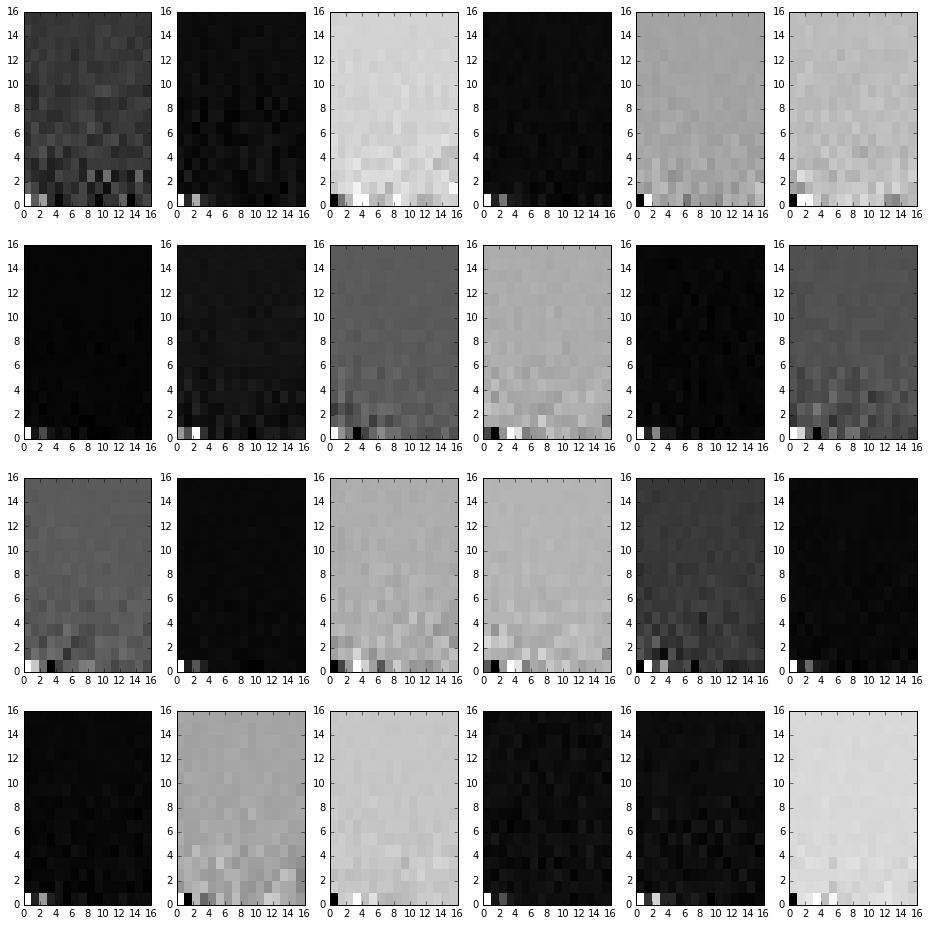

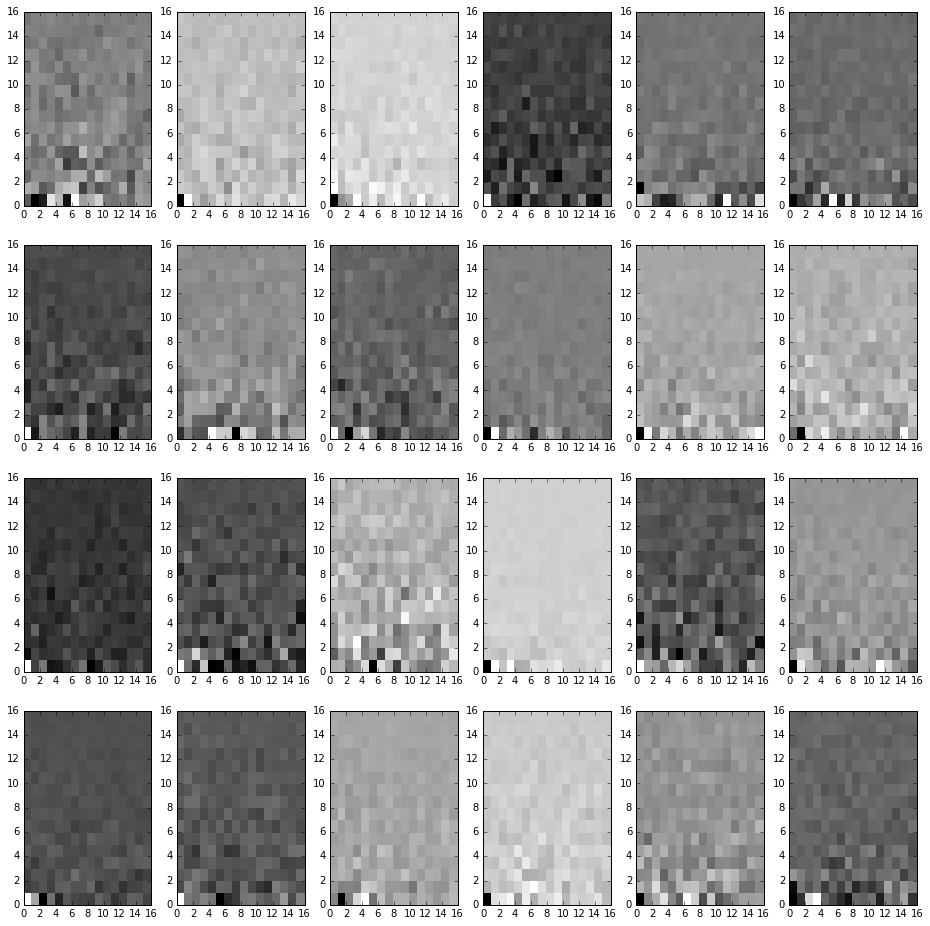

In [24]:
resultsB = PCA(sampleMatrixB)
resultsN = PCA(sampleMatrixN)
#TODO

f, ax = plt.subplots(4,6,figsize=(16, 16))
for x in xrange(0, 24):
    ax[x/6,x%6].pcolor(resultsB.Y[x,:].reshape((16,16)), cmap=plt.get_cmap('gray'))

f, ax = plt.subplots(4,6,figsize=(16, 16))
for x in xrange(0, 24):
    ax[x/6,x%6].pcolor(resultsN.Y[x,:].reshape((16,16)), cmap=plt.get_cmap('gray'))

<img src="img/Auswahl_2016-05-02_015.png"></img>

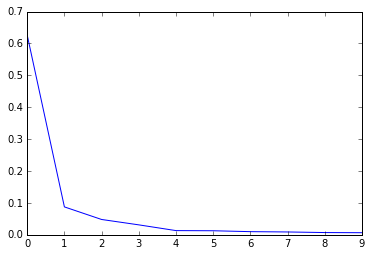

In [80]:
plt.plot(resultsB.fracs[0:10]) 
plt.show()

From the elbow-plot of the fraction each PC contributes to the total variance, the first 4 PCs contribute the main part of the total variance. From the 5th PC on they all contribute almost nothing to the variance. Hence the first four PC should be kept for the building images.

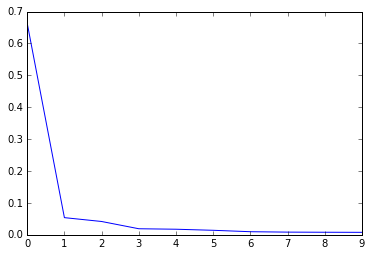

In [81]:
plt.plot(resultsN.fracs[0:10])
plt.show()

From the elbow-plot of the fraction each PC contributes to the total variance, the first 3 PCs contribute the main part of the total variance. From the 4th PC on they all contribute almost nothing to the variance. Hence the first three PC should be kept for the nature images.